In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
filename = "Data/Irradiance_39.xlsx"

# read data from excel file, and from columns A to E
df = pd.read_excel(filename, index_col=0, usecols="A:E")

# drop the "Ghi Prev Day" column
df.drop("Ghi Prev Day", axis=1, inplace=True)

df["Ghi Curr Day"] = (df["Ghi Curr Day"] - df["Ghi Curr Day"].min()) / (df["Ghi Curr Day"].max() - df["Ghi Curr Day"].min())

In [3]:
# separate the irradiance data into 10 groups of evenly spaced irradiance value
df["group"] = pd.cut(df["Ghi Curr Day"], 10, labels=False)

In [4]:
df.loc[df["group"] == 6]

,Time,Season,Ghi Curr Day,group
PeriodStart,,,,
2020-01-02T12:00:00Z,25,3,0.613615,6
2020-01-02T12:30:00Z,26,3,0.658677,6
2020-01-03T13:30:00Z,28,3,0.603068,6
2020-01-04T12:30:00Z,26,3,0.668265,6
2020-01-04T13:00:00Z,27,3,0.689358,6
...,...,...,...,...
2020-12-30T14:30:00Z,30,3,0.622244,6
2020-12-30T15:00:00Z,31,3,0.624161,6
2020-12-31T10:30:00Z,22,3,0.658677,6


(array([30., 33., 24., 14., 13., 11.,  7.,  4.,  8.,  3.]),
 array([0.90028763, 0.91025887, 0.92023011, 0.93020134, 0.94017258,
        0.95014382, 0.96011505, 0.97008629, 0.98005753, 0.99002876,
        1.        ]),
 <BarContainer object of 10 artists>)

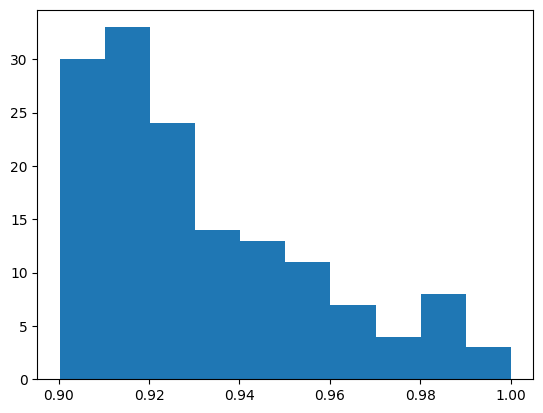

In [11]:
plt.hist(df.loc[df["group"] == i, "Ghi Curr Day"].values)

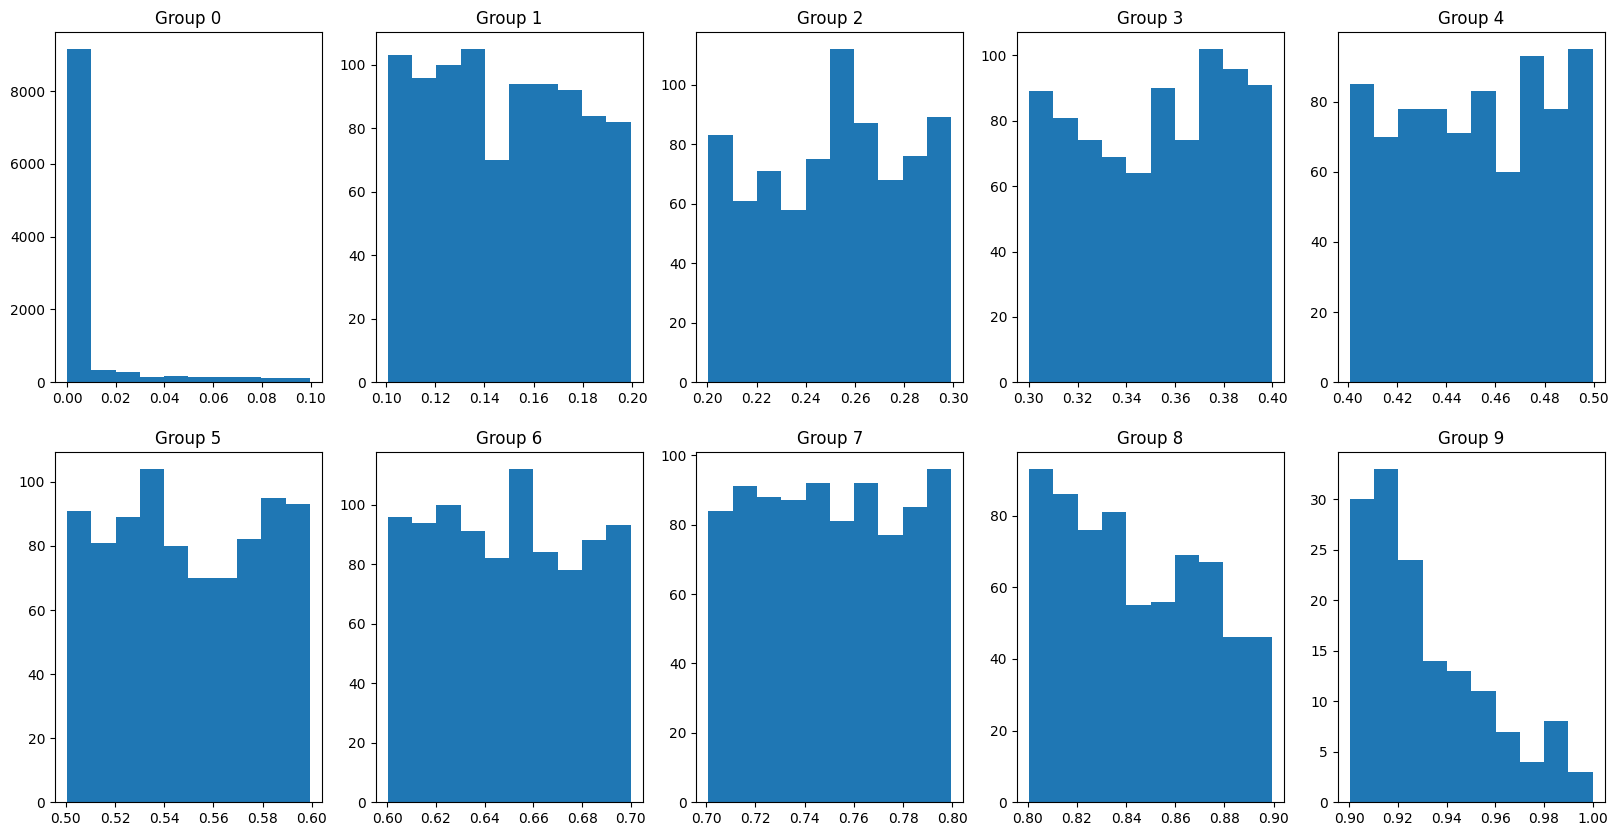

In [13]:
# visualize histogram for Ghi Curr Day of every group 
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i in range(10):
    ax[i//5, i%5].hist(df.loc[df["group"] == i, "Ghi Curr Day"].values)
    ax[i//5, i%5].set_title("Group {}".format(i))